# Project: Predicting the Presence of Heart Disease

### Introduction
   
Heart disease refers to the buildup of plaque in the heart's arteries that can ultimately lead to a heart attack, heart failure, or death.  [The Government of Canada website](https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html) identifies heart disease as the 2nd leading cause of death in Canada.  According to 2017–2018 data from the Canadian Chronic Disease Surveillance System (CCDSS):  
* about 1 in 12 (or 2.6 million) Canadian adults age 20 and over live with diagnosed heart disease
* every hour, about 14 Canadian adults age 20 and over with diagnosed heart disease die

Heart disease impacts a significant portion of the population and prevention of heart disease is clearly important so that more people can live longer, healthier lives.  The development of data-driven methods for predicting heart disease can be used to improve prevention processes by advancing our understanding of the associated risk factors and identifying disease at early onset to allow for rapid intervention.

The Cleveland Heart Disease database ([cleve.mod](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod)), available from the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease), contains 14 variables related to heart disease diagnosis in 303 anonymous patients.  The variable information is as follows:    

* Age (years) 
* Sex (male or female)
* Chest pain type (typical angina, atypical angina, non-anginal pain, asymptomatic)
* Resting blood pressure (mm Hg)
* Cholesterol (mg/dl)
* Fasting blood sugar < 120 mg/dl (true or false)
* Resting electrocardiographic results (normal, abnormal, hypertrophy)
* Max. heart rate (BPM)
* Exercise induced angina (true or false)
* Oldpeak - ST depression induced by exercise relative to rest (mm)
* Slope - the slope of the peak exercise ST segment (upsloping, flat, down sloping)
* Number of major vessels colored by fluoroscopy (0 to 3)  
* Thalassemia blood disorder (normal, fixed defect, reversible defect)
* Presence of heart disease (yes or no)

This project aims to answer the question: can we use the Cleveland Heart Disease data set to develop a classification model to predict the presence of heart disease in a patient, and if so, what is the accuracy of the classification model?

<img src="https://www.heart.org/-/media/Images/News/2019/July-2019/0725LifeExpectancy_SC.jpg?h=600&w=800&hash=77AD97769808EC7B6D24843976A7CE99" alt="Life Expectancy" height="400" width="400" />

### Exploratory Analysis
In the exploratory analysis, we read the Cleveland Heart Disease data set from the web into R 
and clean and wrangle the data into a tidy format.  From the initial set of 13 possible predictor variables we can eliminate those that do not contain numerical data, reducing the number of possible predictor variables to 6 (i.e., age, resting blood pressure, cholesterol, max. heart rate, oldpeak, and number of major vessels colored). We split the data into a training and testing sets assuming a 75/25 split and then generate summary tables and visualizations (box plots and bar charts) from the testing set to determine which numerical variables to use to predict the categorical class variable (presence of heart disease).



Source of data set: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod

#### Data Preparation
* Load `tidyverse`, `repr`, `tidymodels`, `cowplot` libraries to perform classification and wrangling
* Set window size using `options()`

In [1]:
# load libraries and set seed value
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

#### Data Wrangling
* Load the data using `read_table()`, skip the extra titles and descriptions using `skip()`
* Assign column names by creating a vector using `c()`
* Use select() to select all variables we need for the project
* Some data contain categorical vallues such as "male" and "fem". In order to perform classification, we need to change them into numerical values of our choice using `replace()` inside the `mutate()`
* Reorder the columns by putting `presence_of_heart_disease` up front using `bind_cols()` so that we can work with it (grouping, summarizing) easilier
* Retreive number of missing data through `group_by()` and `map_df(~sum(is.na(.)))` with our predicting variable `presence_of_heart_disease` 
* Through the output, we can tell there are 5 rows missing for `number_of_vessels_colored`. Therefore, we decided to filter them out using `filter(number_of_vessels_color != "NA")` to ensure they will not be taken into account

In [2]:
# read data set from web
data <- read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod", skip = 19, col_names=FALSE) 

# assign column names
colnames(data) <- c("age", 
                    "sex", 
                    "chest_pain_type", 
                    "resting_blood_pres", 
                    "cholesterol", 
                    "fasting_blood_sugar", 
                    "resting_ecg", 
                    "max_heart_rate", 
                    "exercise_induced_angina", 
                    "oldpeak", 
                    "slope", 
                    "number_of_vessels_colored", 
                    "thal", 
                    "presence_of_heart_disease", 
                    "sickness_classifier")

# select numerical variables
data_selected <- data |>
    select("age", "sex", "resting_blood_pres", "cholesterol", "fasting_blood_sugar", "resting_ecg", "max_heart_rate", "exercise_induced_angina",
     "oldpeak", "number_of_vessels_colored", "presence_of_heart_disease")

# change boolean(true/false) and categorical values into numerical values in order yo visualize the affect
data_mutated <- data_selected |>
    mutate(sex = replace(sex, sex == "male", 0)) |>
    mutate(sex = replace(sex, sex == "fem", 1)) |>
    mutate(sex = as.numeric(sex)) |>

    mutate(fasting_blood_sugar = replace(fasting_blood_sugar, fasting_blood_sugar == "true", 1)) |>
    mutate(fasting_blood_sugar = replace(fasting_blood_sugar, fasting_blood_sugar == "fal", 0)) |>
    mutate(fasting_blood_sugar = as.numeric(fasting_blood_sugar)) |>

    mutate(fasting_blood_sugar = replace(fasting_blood_sugar, fasting_blood_sugar == "true", 1)) |>
    mutate(fasting_blood_sugar = replace(fasting_blood_sugar, fasting_blood_sugar == "fal", 0)) |>
    mutate(fasting_blood_sugar = as.numeric(fasting_blood_sugar)) |>

    mutate(resting_ecg = replace(resting_ecg, resting_ecg == "norm", 0)) |>
    mutate(resting_ecg = replace(resting_ecg, resting_ecg == "abn", 1)) |>
    mutate(resting_ecg = replace(resting_ecg, resting_ecg == "hyp", 2)) |>
    mutate(resting_ecg = as.numeric(resting_ecg)) |>

    mutate(exercise_induced_angina = replace(exercise_induced_angina, exercise_induced_angina == "true", 1)) |>
    mutate(exercise_induced_angina = replace(exercise_induced_angina, exercise_induced_angina == "fal", 0)) |>
    mutate(exercise_induced_angina = as.numeric(exercise_induced_angina)) |>

    mutate(number_of_vessels_colored = as.numeric(number_of_vessels_colored)) |>

    mutate(presence_of_heart_disease = replace(presence_of_heart_disease, presence_of_heart_disease == "buff", "no")) |>
    mutate(presence_of_heart_disease = replace(presence_of_heart_disease, presence_of_heart_disease == "sick", "yes")) |>
    mutate(presence_of_heart_disease = as_factor(presence_of_heart_disease))

# re-order columns
data_ordered <- bind_cols(select(data_mutated, presence_of_heart_disease),select(data_mutated, -presence_of_heart_disease))

# summarize the number of missing data
summary_na_table <- data_ordered |> 
group_by(presence_of_heart_disease) |>
map_df(~sum(is.na(.)))

# remove rows with na data from data set (5 rows total)
data_prelim <- data_ordered |>
    filter(number_of_vessels_colored != "NA")


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_double(),
  X9 = col_character(),
  X10 = col_double(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_character(),
  X15 = col_character()
)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [3]:
# print summary of the number of missing data
summary_na_table

presence_of_heart_disease,age,sex,resting_blood_pres,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,number_of_vessels_colored
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,5


###### <span style="color: red"> Table 1: Summary of the number of missing data (i.e., NA values) for each variable in the heart disease data set </span>

In [4]:
# print final data set
data_prelim

presence_of_heart_disease,age,sex,resting_blood_pres,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,number_of_vessels_colored
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no,63,0,145,233,1,2,150,0,2.3,0
yes,67,0,160,286,0,2,108,1,1.5,3
yes,67,0,120,229,0,2,129,1,2.6,2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
yes,49,0,118,149,0,2,126,0,0.8,3
no,74,1,120,269,0,2,121,1,0.2,1
no,54,1,160,201,0,0,163,0,0.0,1


######  <span style="color: red"> Table 2: Preliminary heart disease data set </span>

#### Build the Classification Model:
##### 1. Split the data so that training set has 75% data and testing set has 25% data using `initial_split()` and set `prop = .75`

In [5]:
set.seed(2000)

#split data into training and testing sets
data_split <- initial_split(data_prelim, prop = .75, strata = presence_of_heart_disease)
data_training <- training(data_split)
data_testing <- testing(data_split)

In [6]:
# print training data set
data_training

presence_of_heart_disease,age,sex,resting_blood_pres,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,number_of_vessels_colored
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no,63,0,145,233,1,2,150,0,2.3,0
no,37,0,130,250,0,0,187,0,3.5,0
no,41,1,130,204,0,2,172,0,1.4,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
yes,42,0,136,315,0,0,125,1,1.8,0
yes,77,0,125,304,0,2,162,1,0.0,3
yes,49,0,118,149,0,2,126,0,0.8,3


###### <span style="color: red"> Table 3: Heart disease training data set

In [18]:
data_testing

presence_of_heart_disease,age,sex,resting_blood_pres,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,number_of_vessels_colored
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
yes,67,0,160,286,0,2,108,1,1.5,3
yes,53,0,140,203,1,2,155,1,3.1,0
yes,56,0,130,256,1,2,142,1,0.6,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
no,68,0,118,277,0,0,151,0,1,1
no,48,0,124,255,1,0,175,0,0,2
no,54,1,160,201,0,0,163,0,0,1


###### <span style="color: red">  Table 4: Heart disease testing data set </span>

##### 2. Summarize the number of observations in each class in training set using `group_by()` and `summarize(count = n())`

In [8]:
# summarize the number of observations in each class in training set
summary_obs_table <- data_training |> 
group_by(presence_of_heart_disease) |>
summarize(count=n())
summary_obs_table

presence_of_heart_disease,count
<fct>,<int>
no,120
yes,102


###### <span style="color: red"> Table 5: Summary of the number of observations for the classification variable (presence of heart disease) in the training data set</span>
###### <p style="color: blue; margin-top: 1rem; font-size: 15px; font-family: Arial;"> Observation from the split: From this 120 and 102 split, we can see that the data is evenly distributed and both sides can be trained properly. </p>

#### Summarize mean values for predictor variable in the training data set to use in classification
* use `group_by()` and `summarize()` to group the results of `presence_of_heart_disease` for every predictor variable
* apply `across()` to all the columns to ensure every predictor is taken into consideration

In [16]:
summary_mean_table <- data_training |> 
group_by(presence_of_heart_disease) |>
summarize(across(age:number_of_vessels_colored, mean)) 
summary_mean_table

presence_of_heart_disease,age,sex,resting_blood_pres,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,number_of_vessels_colored
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no,52.67500,0.4666667,129.3250,247.3500,0.1416667,0.8583333,159.4500,0.1500000,0.6133333,0.2916667
yes,57.23529,0.1764706,133.5686,252.2843,0.1666667,1.2058824,139.0686,0.5098039,1.5382353,1.2058824


###### <span style="color: red"> Table 6: Summary of mean values for each predictor variable in the training data set </span>
###### <p style="color: blue; margin-top: 1rem; font-size: 15px; font-family: Arial">  Table Obeservation: At this stage, we cannot tell how big influence one predictor may have compared to the rest. Without centering and scaling, it is even harder. However, we are able to tell, from the big picture, that cholesterol and fasting_blood_sugar may not be good predictors to use sinve the influence to the result is so little. </p>

#### Visualization
Now, we decide plot the boxgraphs for each predictor to visualize the influence of each predictor and pick the ones we need for our classification model. We use `geom_boxplot()` to visualize the relationship of our predictors and whether they lead to heart disease or not, along with descriptive titles and axis with `xlab()`, `ylab()`, and `ggtitle()`. For graphs that have distinct numerical values such as Sex, Resting ECG, Exercise-Induced Angina and Vessels Colored, we use bar chart (`geom_bar()`) and compare the result generated from every distinct number.

In [17]:
# generate box-plot visualizations
options(repr.plot.width = 8, repr.plot.height = 8)

age_plot <- data_training |>
    ggplot(aes(y = age, x = presence_of_heart_disease)) + 
    geom_boxplot() + 
    ylab("Age (years)") +
    xlab("Heart Disease") +
    ggtitle("Fig.1: Age") +
    theme(text = element_text(size = 17))

rbp_plot <- data_training |>
    ggplot(aes(y = resting_blood_pres, x = presence_of_heart_disease)) + 
    geom_boxplot() + 
    ylab("Resting Blood Pressure (mm Hg)") +
    xlab("Heart Disease") +
    ggtitle("Fig. NA: Resting Blood Pressure") +
    theme(text = element_text(size = 17))

cholesterol_plot <- data_training |>
    ggplot(aes(y = cholesterol, x = presence_of_heart_disease)) + 
    geom_boxplot() +
    ylab("Cholesterol (mg/dl)") +
    xlab("Heart Disease") +
    ggtitle("Fig. NA: Cholesterol") +
    theme(text = element_text(size = 17))

oldpeak_plot <- data_training |>
    ggplot(aes(y = oldpeak, x = presence_of_heart_disease)) + 
    geom_boxplot() +
    ylab("Old Peak (mm)") +
    xlab("Heart Disease") +
    ggtitle("Fig. 2: Old Peak") +
    theme(text = element_text(size = 17))

mhr_plot <- data_training |>
    ggplot(aes(y = max_heart_rate, x = presence_of_heart_disease)) + 
    geom_boxplot() +
    ylab("Max. Heart Rate (BPM)") +
    xlab("Heart Disease") +
    ggtitle("Fig. 3: Max. Heart Rate") +
    theme(text = element_text(size = 17))

# generate bar graph visualizations
sex_plot <- data_training |>
    ggplot(aes(x = sex, fill = presence_of_heart_disease)) + 
    geom_bar(position = "fill") +
    labs(x = "Sex \n (0 = Male, 1 = Female)", y = "Frequency", fill = "Heart Disease") +
    scale_x_continuous(breaks=seq(0, 1)) +
    ggtitle("Fig. 4: Sex") +
    theme(text = element_text(size = 17))

fasting_blood_sugar_plot <- data_training |>
    ggplot(aes(x = fasting_blood_sugar, fill = presence_of_heart_disease)) + 
    geom_bar(position = "fill") +
    labs(x = "Fasting Blood Sugar < 120 mg/dl \n (0 = False, 1 = True)", y = "Frequency", fill = "Heart Disease") +
    scale_x_continuous(breaks=seq(0, 1)) +
    ggtitle("Fig. NA: Fasting Blood Sugar") +
    theme(text = element_text(size = 17))

resting_ecg_plot <- data_training |>
    ggplot(aes(x = resting_ecg, fill = presence_of_heart_disease)) + 
    geom_bar(position = "fill") +
    labs(x = "Resting ECG \n (0 = Normal, 1 = Abnormal, 3 = Hypertrophy)", y = "Frequency", fill = "Heart Disease") +
    scale_x_continuous(breaks=seq(0, 2, 1)) +
    ggtitle("Fig. 5: Resting ECG") +
    theme(text = element_text(size = 17))

exercise_induced_angina_plot <- data_training |>
    ggplot(aes(x = exercise_induced_angina, fill = presence_of_heart_disease)) + 
    geom_bar(position = "fill") +
    labs(x = "Exercise-Induced Angina \n (0 = False, 1 = True)", y = "Frequency", fill = "Heart Disease") +
    scale_x_continuous(breaks=seq(0, 1)) +
    ggtitle("Fig. 6: Exercise-Induced Angina") +   
    theme(text = element_text(size = 17))

data_vessels_plot <- data_training |>
    ggplot(aes(x = number_of_vessels_colored, fill = presence_of_heart_disease)) +
    geom_bar(position = "fill") +
    labs(x = "Number of Vessels Colored", y = "Frequency", fill = "Heart Disease", title = "Fig. 7: Vessels Colored") +
    scale_x_continuous(breaks=seq(0, 3, 1)) +
    theme(text = element_text(size = 17))

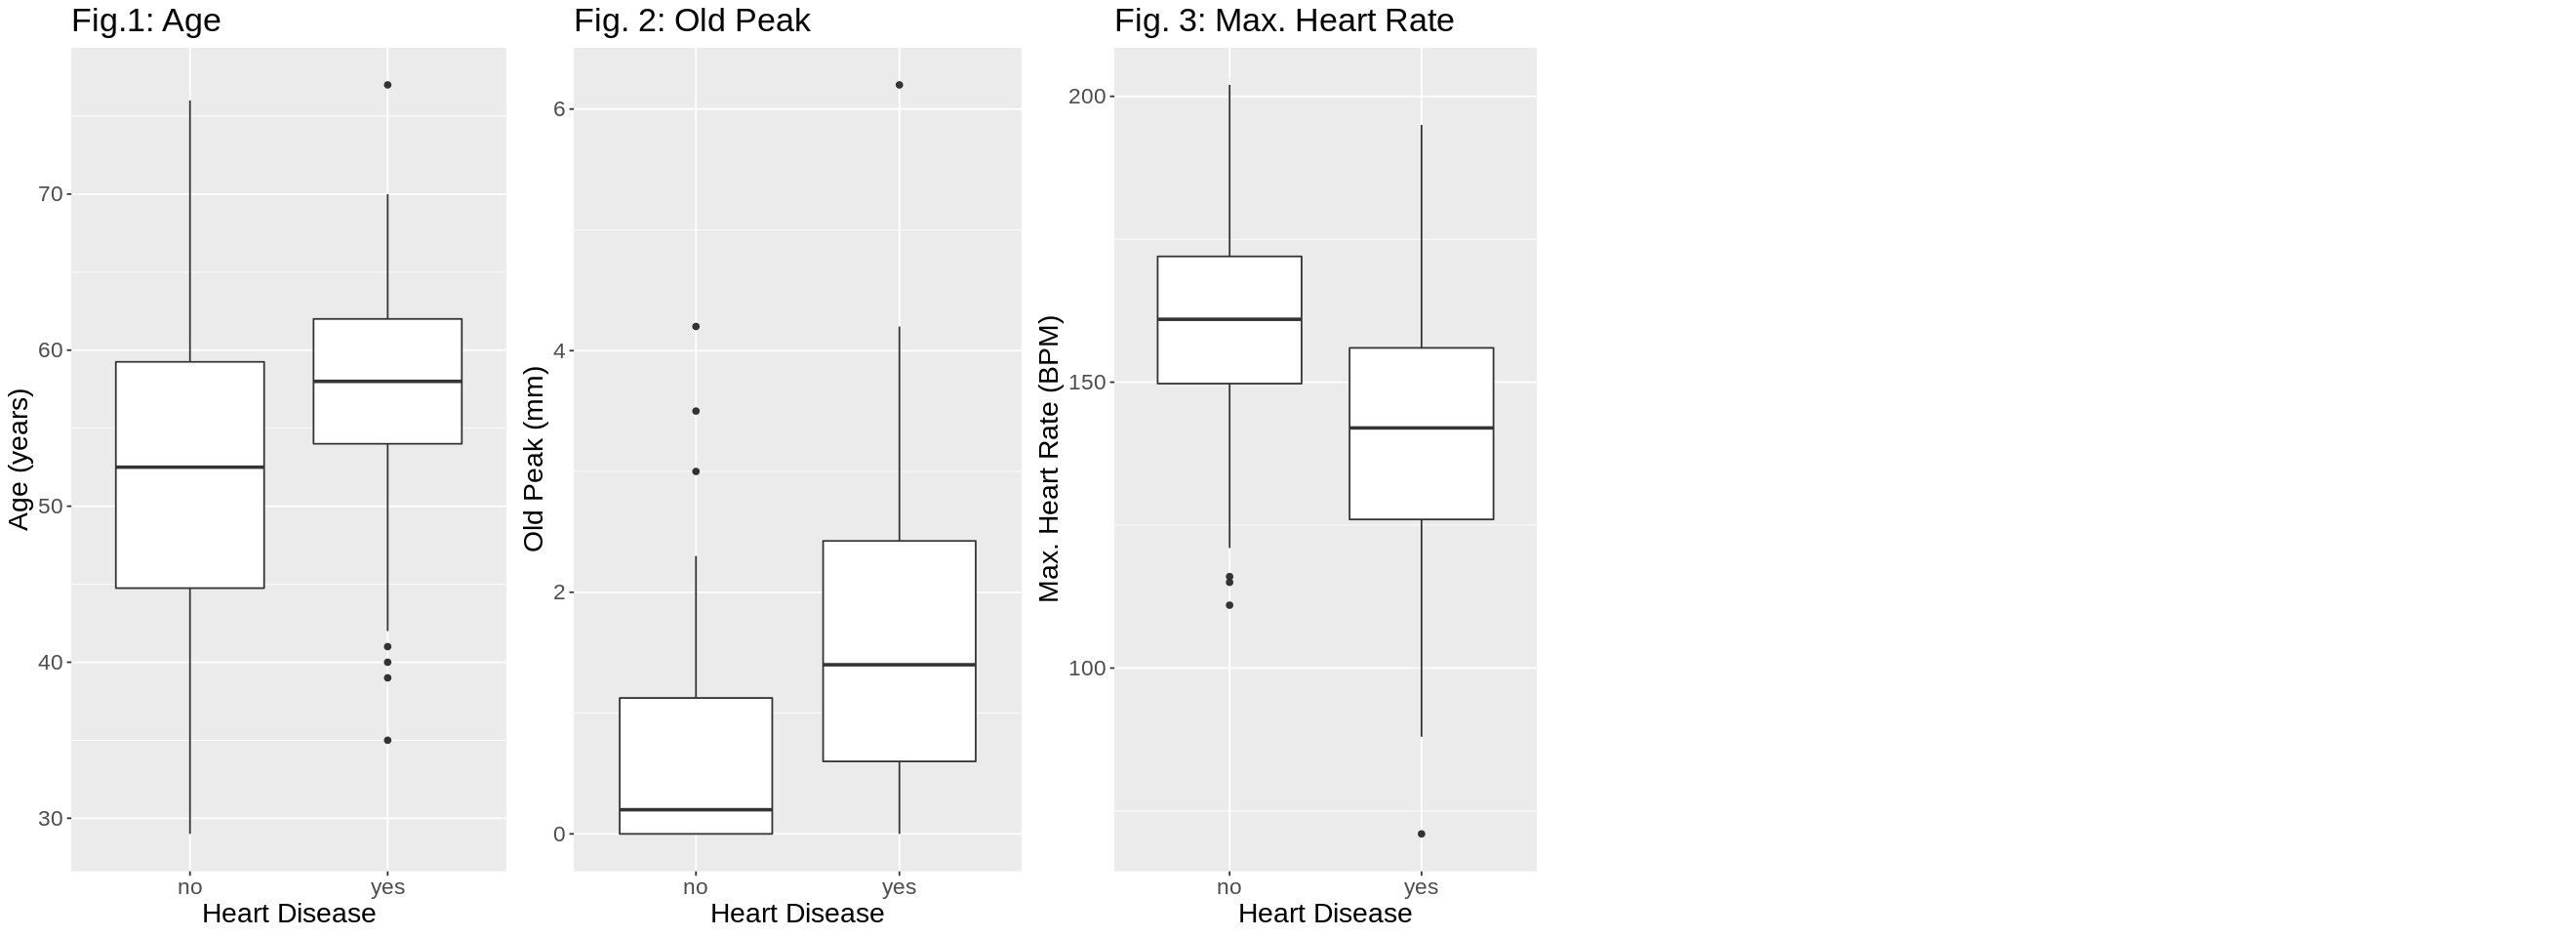

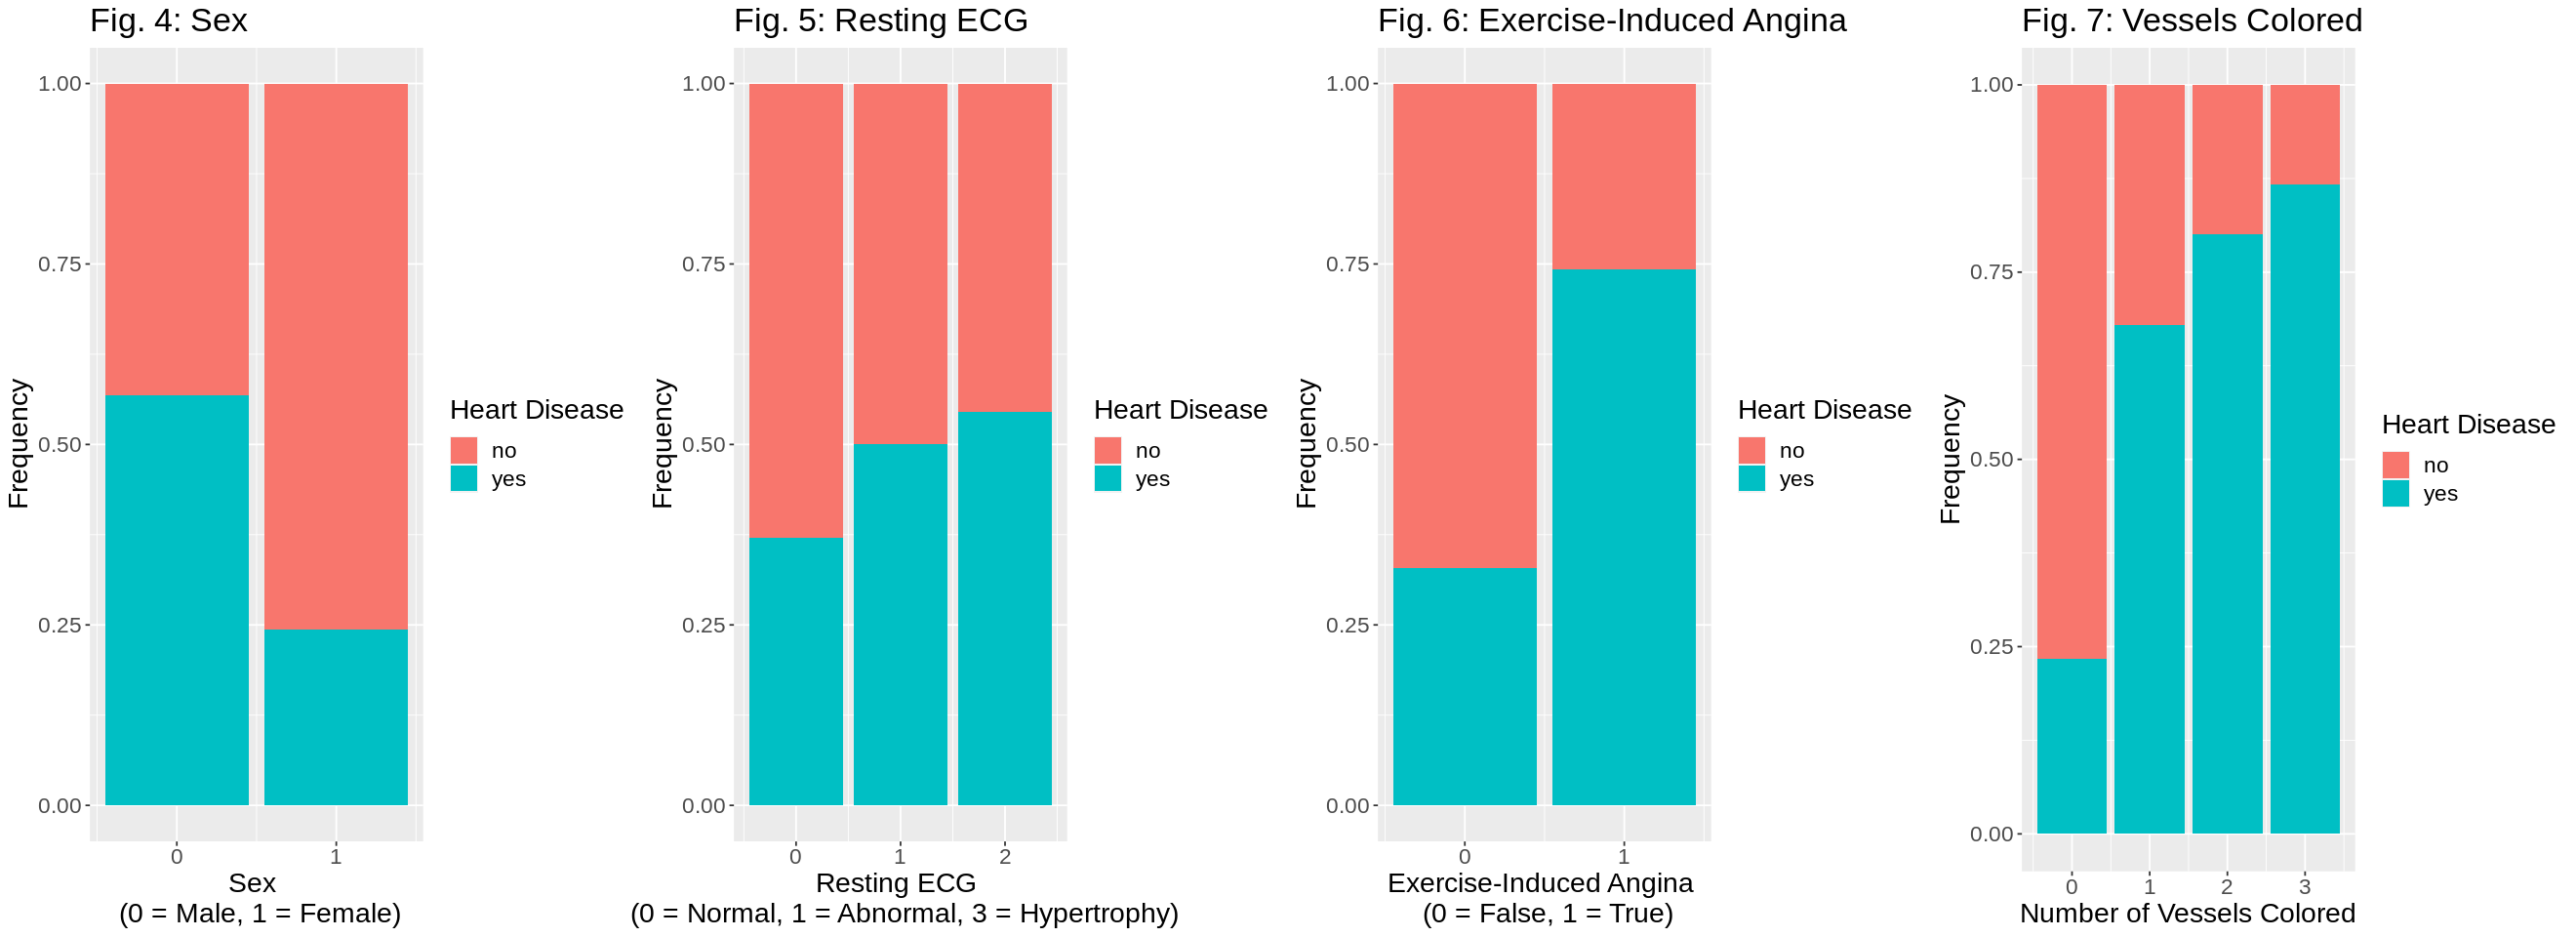

In [11]:
options(repr.plot.width = 22, repr.plot.height = 8)

plot_grid_1 <- plot_grid(age_plot, oldpeak_plot, mhr_plot, ncol = 5)
plot_grid_1

options(repr.plot.width = 22, repr.plot.height = 8)
plot_grid_2 <- plot_grid(sex_plot, resting_ecg_plot,
                         exercise_induced_angina_plot, data_vessels_plot, ncol = 4)
plot_grid_2

##### <span style = "color: blue"> Conclusion from ggplot: Predictors to include (7 total): Age, Old Peak, Max. Heart Rate, Sex, Resting ECG, Exercise Induced-Angina, Vessels Colored </span>

Based on the above graphs and tables, it can be concluded that age, old peak, maximum heart rate, and number of vessels colored, all show an association with the presence of heart disease and therefore are good candidates to include in our model for predicting heart disease. In contrast, resting blood pressure and cholesterol show little to no association with the presence of heart disease and therefore will not be included as predictors in the classification model.

#### Data Preprocessing + Knn Workflow:
* Start by creating a recipe using `recipe()` with all the scaled data since some data has higher influence due to their values. Therefore, we apply `step_scale()` and `step_center()` to all predictors of our choice.
* Use `vfold(v = 10)` to perform the cross-validation to get more accurate results
* Create a tibble range from `1 to 25` to fit k with `tibble(neighbors = seq(1,25))`
* Create a workflow object using `tune_grid()` and `collect_metrics()` and filter out `.metric == "accuracy"`
* Finally, arrange the mean distance in descending order using `arrange(desc(mean))`

In [12]:
set.seed(2000) 

hd_recipe <- recipe(presence_of_heart_disease ~ age + max_heart_rate + oldpeak + sex + 
                    resting_ecg + exercise_induced_angina + number_of_vessels_colored, 
                    data = data_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine ("kknn") |>
    set_mode ("classification")

hd_vfold <- vfold_cv(data_training, v = 10, strata = presence_of_heart_disease)
grid_vals <- tibble(neighbors = seq(1, 25))

hd_results <- workflow() |>
    add_recipe(hd_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = hd_vfold, grid = grid_vals) |>
    collect_metrics() |>
    filter (.metric == "accuracy") |>
    arrange(desc(mean))
hd_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
21,accuracy,binary,0.8114625,10,0.03376460,Preprocessor1_Model21
22,accuracy,binary,0.8114625,10,0.03376460,Preprocessor1_Model22
15,accuracy,binary,0.8071146,10,0.03702005,Preprocessor1_Model15
⋮,⋮,⋮,⋮,⋮,⋮,⋮
6,accuracy,binary,0.7660079,10,0.03417468,Preprocessor1_Model06
3,accuracy,binary,0.7298419,10,0.03302893,Preprocessor1_Model03
4,accuracy,binary,0.7298419,10,0.03302893,Preprocessor1_Model04


###### <span style="color: red"> Table 7: Knn workflow parameters for different k neighbors </span>

#### Picking K-best + Visualization:
* Pick the best k by first calling `arrange(desc(mean))` from all k values in the model. This arranges the table with decreasing k values
* Call `filter(neighbors == k_best)` and then select the mean by calling `select(mean)` to retrieve the largest k
* Create a `ggplot` with line, points and vertical line crossing through the biggest k: `geom_vline(xintercept = ...)`
* Use `labs` to create descriptive titles and axis and call `scale_x_continuous()` to adjust borders and breaks of the graph
* Call `theme()` to adjust size of the caption and text

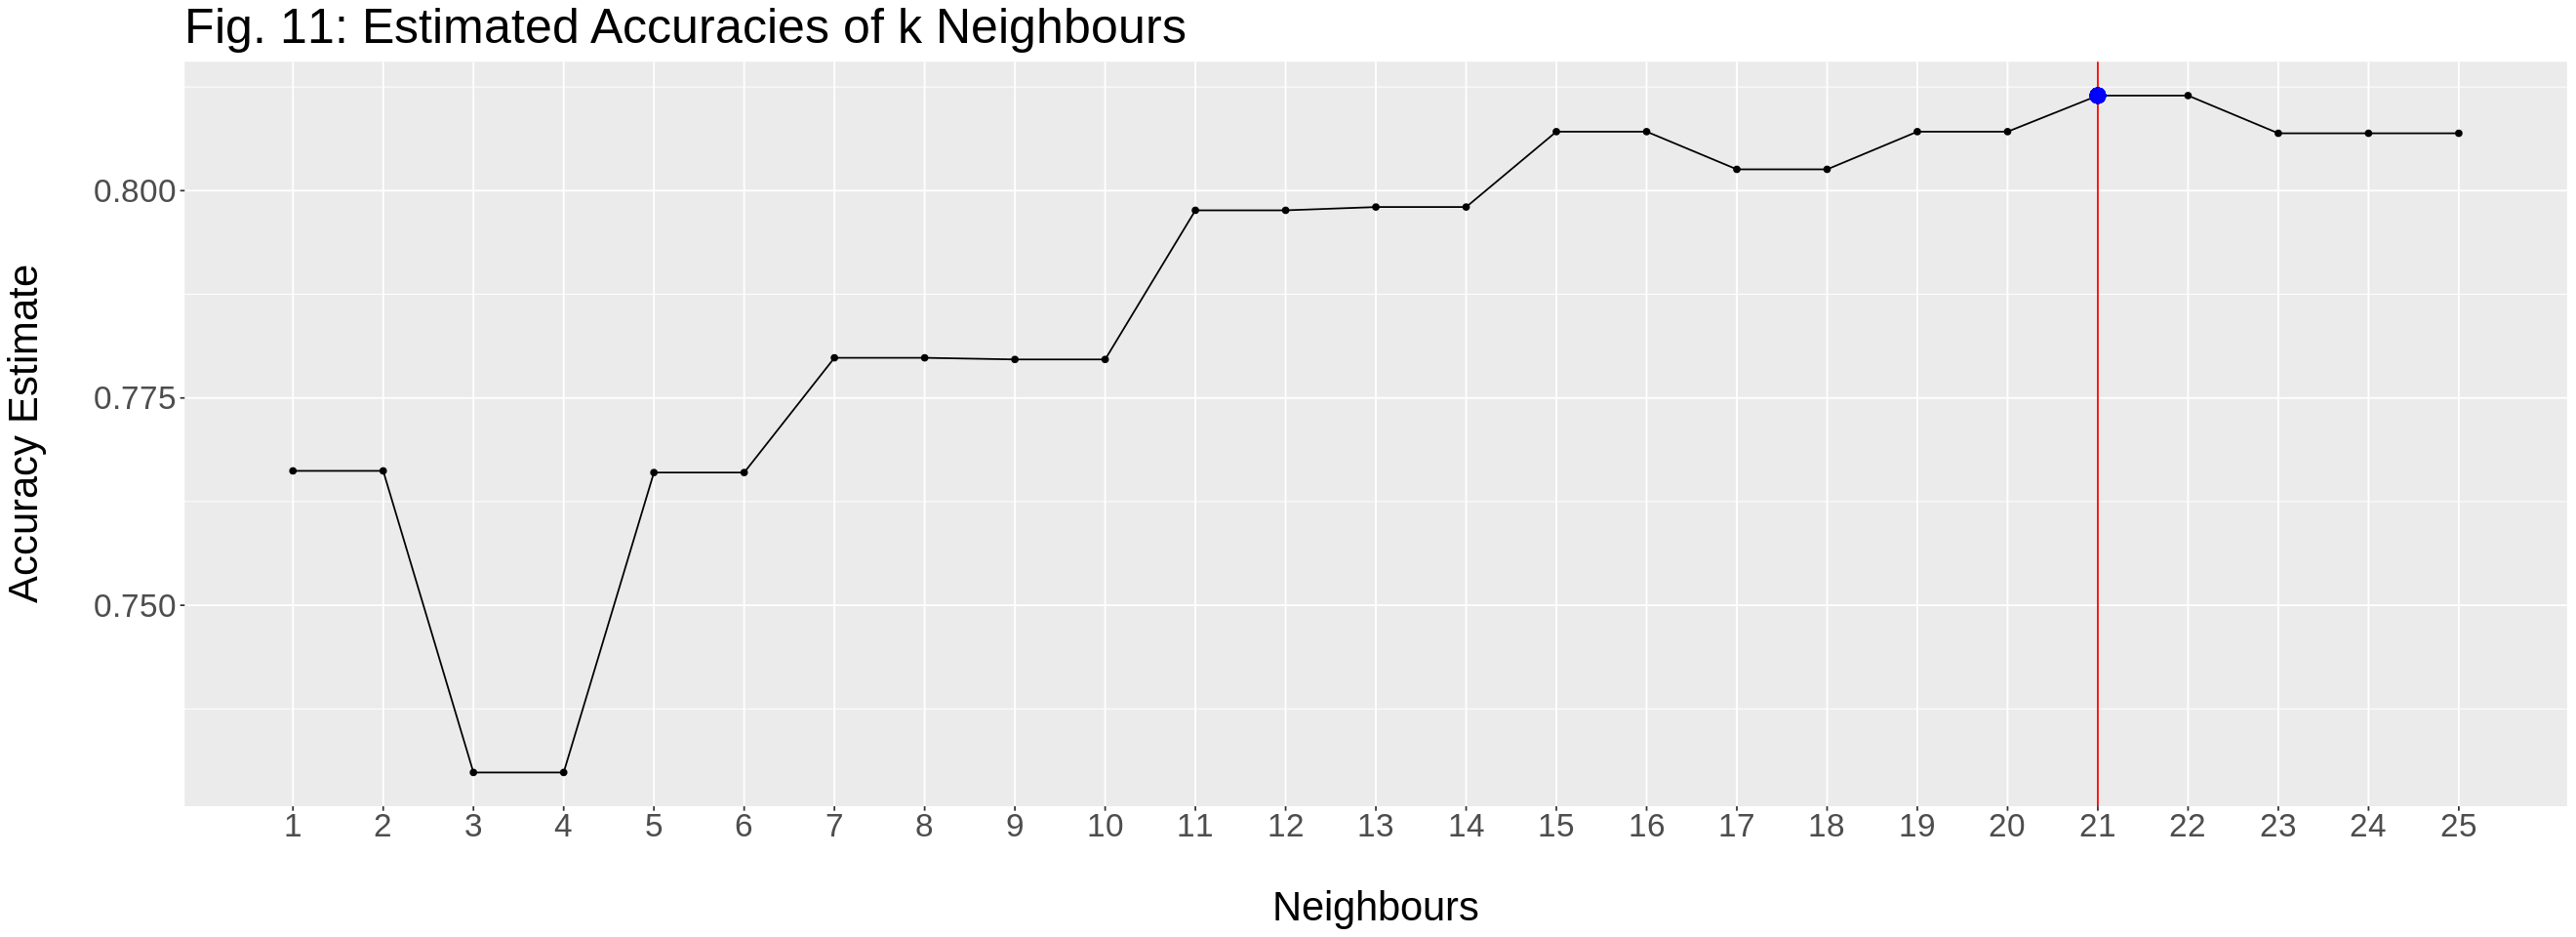

In [15]:
k_best <- hd_results |>
    arrange(desc(mean)) |>
    select(neighbors) |>
    slice(1) |>
    pull()

ky <- hd_results |>
    filter(neighbors == k_best) |>
    select(mean) |>
    pull()

cross_val_plot <- hd_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = k_best, colour = "red") +
    geom_point(aes(x = k_best, y = ky), size = 4, colour = "blue") +
    labs(x = "\nNeighbours",
         y = "Accuracy Estimate\n",
         title = "Fig. 11: Estimated Accuracies of k Neighbours") +
    scale_x_continuous(limits = c(1, 25),
                       breaks = seq(1, 25),
                       minor_breaks = seq(1, 25, 1)) +
    theme(text = element_text(size = 25),
          plot.caption = element_text(size = 20, hjust = 0))

cross_val_plot

###### <p style="color: blue; margin-top: 1rem; font-size: 15px; font-family: Arial"> Fig.11: Asides from finding the maximum k using `arrange(desc(mean))`, we can also visualize it through ggplot illustration. </p>

#### Knn Model Rebuilt with the best k value selected:
* Create a workflow object and pass the new model and recipe into it using the training set and fit the data onto the training data set by calling `fit()`.
* Predict the result for the classification by passing the fitted training object and testing set into the `predict()` as arguments and bind the testing data for testing purpose by calling `bind_cols(testing_data)` 
* Extract the result we care about from all the columns by applying `metrics(truth = presence_of_heart_disease, estimate = .pred_class)` and select `.metric` and `estimate`; call `head(1)` to retrieve the accuracy row we want
* Analyze the model's predicting ability on the testing data set with confusion matrix: `conf_mat(truth = presence_of_heart_disease, estimate = .pred_class)`

In [19]:
set.seed(2000) 

knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_best) |>
    set_engine ("kknn") |>
    set_mode ("classification")

hd_fit <- workflow() |>
    add_recipe(hd_recipe) |>
    add_model(knn_best_spec) |>
    fit(data = data_training) 

hd_predictions <- predict(hd_fit, data_testing) |>
    bind_cols(data_testing)

# compare the accuracy of predictions to the true values in the test set
hd_acc <- hd_predictions |> 
    metrics(truth = presence_of_heart_disease, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)

# compare the predictions to the true values in a confusion matrix
hd_cm <- hd_predictions |> 
    conf_mat(truth = presence_of_heart_disease, estimate = .pred_class)

In [20]:
hd_acc

.metric,.estimate
<chr>,<dbl>
accuracy,0.7763158


###### <span style="color: red"> Table 7: Table of knn workflow objects <p style="color: black; margin-top: 1rem; font-size: 15px; font-family: Arial"> From the `.estimate` column, we can see that our model's accuracy is close to 78% </p> </span> 

In [21]:
hd_cm

          Truth
Prediction no yes
       no  36  12
       yes  5  23

###### <span style="color: red"> Table 8: The 2-column, true-false matrix table <p style="color: black; margin-top: 1rem; font-size: 15px; font-family: arial"> From this matrix table, The classifier misdiagonosed heart diseases under yes coloumn with an accuracy of 65% (23/35) and under no column with an accuracy of 83% (36/41) </p> </span> 

### Discussion

We found that our model could relatively accurately predict the presence of heart disease given seven predictors: age, old peak, number of colored blood vessels, maximum heart rate, sex, resting ECG, and exercise-induced angina. The model was able to predict at a 77.6% accuracy, which is better than a randomly predicted model of 54% (one where no is predicted 100% of the time), and similar to the prediction from the American Journal of Cardiology which had an accuracy of around 77% (Detrano, Janosi, et al., 1989). This is what we expected to find in our initial projections. However, even though this prediction model shows relatively accurate results, it still needs to be more accurate to have actual medical applications in the real world. A 23% rate of incorrectly diagnosing somebody is far too large to use when the impacts could be fatal. However, these findings do lead to future questions regarding heart disease prediction. For example, if more predictors were available, would the accuracy increase? Does the accuracy of the prediction model change based on geographical location? Overall, while the current model is an accurate prediction for the given information, it is still not enough to apply it to the medical field unless further processes are done to increase accuracy.

### Citations

Detrano, R.(1990). "cleve.mod". Heart Disease Data Set, UCI machine learning repository. https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod

Detrano, R., Janosi, A., et al.(1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.

"Heart Disease in Canada".(2022). Government of Canada. https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html

"Here's How Many Years You Could Gain By Keeping Heart Disease At Bay".(2019). Heart.org. https://www.heart.org/-/media/Images/News/2019/July-2019/0725LifeExpectancy_SC.jpg?h=600&w=800&hash=77AD97769808EC7B6D24843976A7CE99